Harry Wills 2024

Exploring the 'Palmer Penguins Dataset' to understand more about penguins (my best mate's favourite animal)

The data was collected for research that was conducted as part of the Palmer Station, Antarctica, Long-Term Ecological Research program which was supported by grants through the National Science Foundation, Office of Polar Programs (NSF-OPP).

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [475]:
penguin_df = pd.read_csv('penguins.csv')
penguin_df

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [476]:
categorical_features = ['species', 'island', 'sex']
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

In [477]:
# Dropping the ID column as it is unncecessary
penguin_df.drop(["id"], axis=1, inplace=True) 

In [478]:
penguin_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

It appears that there is a few missing values for a few features, and a lot for the sex of the penguins. Wonder how they managed that!? Let's handle that...

Given that sex is missing a lot of data, and it would be wrong to assume the gender of the penguins. This leads me to decide that it would be best to just get rid of the rows containing NaN values as it will not have a large scale effect on the current data.

In [479]:
penguin_df.dropna(inplace=True)

There we go! No more missing values. Let's explore this data deeper...

What could be cool is to see the different percentages of sex's per country!

sex,female,male
island,,
Biscoe,48.484848,49.404762
Dream,36.969697,36.904762
Torgersen,14.545455,13.690476


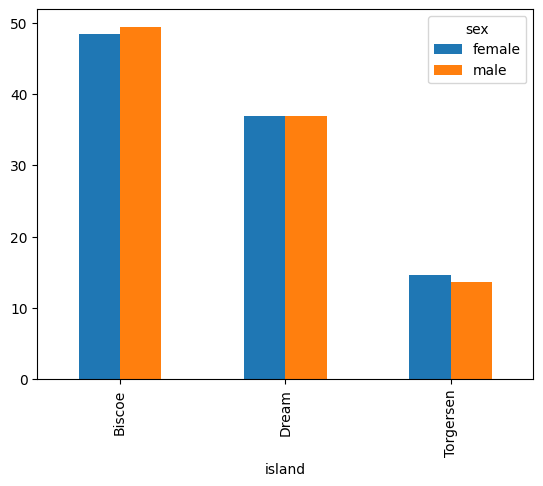

In [480]:
penguins_country_df = penguin_df.groupby('island')['sex'].value_counts().unstack()
for col in penguins_country_df.columns:
    penguins_country_df[col] = (penguins_country_df[col] / penguins_country_df[col].sum()) * 100
penguins_country_df.plot(kind='bar')
penguins_country_df


Intersting... so it seems pretty well balanced overall in terms of sex of penguin per island. How about we look at penguin species per island!

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44.0,NaN,119.0
Dream,55.0,68.0,NaN
Torgersen,47.0,NaN,NaN


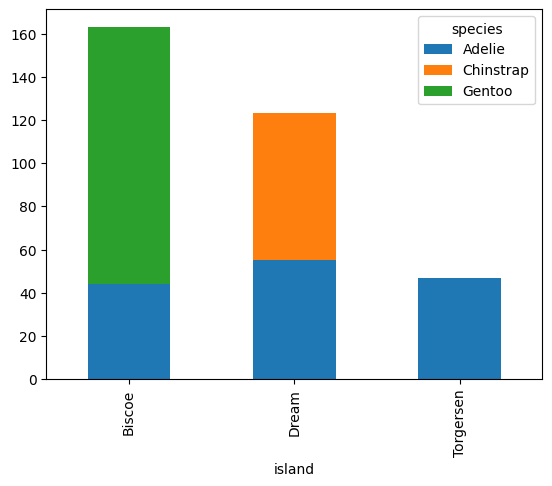

In [481]:
species_per_island = penguin_df.groupby('island')['species'].value_counts().unstack()
species_per_island.plot(kind='bar', stacked=True)
species_per_island

Now thats interesting. Seems like the Adelie specie populate all 3 islands, as well as being the only specie on the Torgersen island. Seems like there is a lot of Gentoo penguins in Biscoe so I wonder what the percentage of species is for this dataset...

In [482]:
species_percentage = penguin_df['species'].value_counts(normalize=True) * 100
print("Specie percentage in dataset:")
for specie in species_percentage.index:
    print(f"{specie}: {species_percentage[specie]:.2f}%")

Specie percentage in dataset:
Adelie: 43.84%
Gentoo: 35.74%
Chinstrap: 20.42%


From what we can see above, the Adelie is clearly the most populated specie, but for Gentoo to only be on one island, there is a lot of them. Seems like they need to do some exploring!

Now let's look at what else this dataset holds...

<Axes: xlabel='year', ylabel='count'>

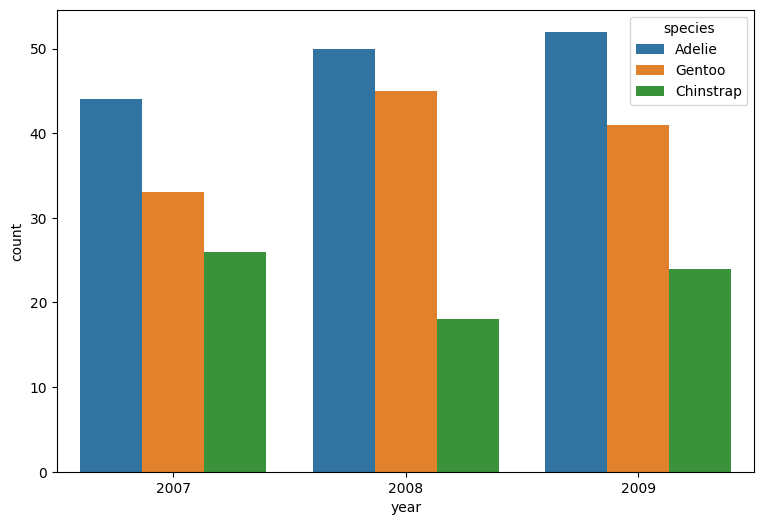

In [483]:
# Specie population over the years
penguin_df['year'] = penguin_df['year'].astype(str)

plt.figure(figsize=(9, 6))
sns.countplot(data=penguin_df, x='year', hue='species')

Having a look at the specie trend from 2007 - 2009, we can see the steady increase in the Adelie specie, the rise and fall of the Gentoo penguin, and the decrease and increase in the Chinstrap penguin. 

Let's see if there is some correlation with the numerical features in this dataset.

<Axes: >

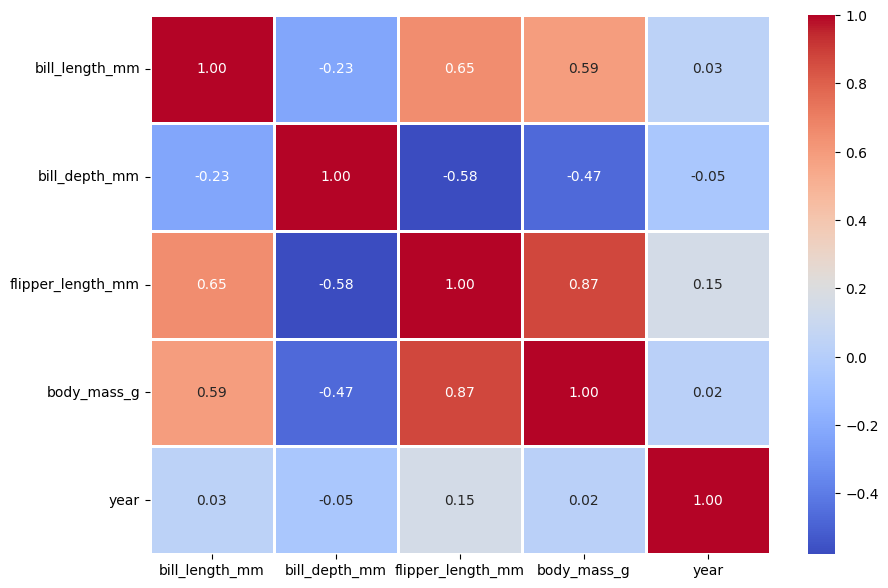

In [484]:
numerical_df = penguin_df[numerical_features]
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

Wow. There seems to be a strong correlation between the body mass and the flipper length of the penguins. This would make sense as it seems like a common thing in animal nature and human nature that if someone's feet are big, they are typically taller and larger meaning a bigger body mass (and vice-versa).

There also seems to be a moderate correlation between the flipper length and the bill length. This is more surpsing to me as I wouldn't of thought that the size of the penguin's flipper would have a reflection on the length of it's beak. 